In [1]:
pip install opencv-python

In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)

In [10]:
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [11]:
model = tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam' , loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])



In [27]:
model.fit(x=X_train,y = y_train, epochs= 30, verbose = 1, validation_data = (X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0747 - accuracy: 0.9774 - val_loss: 0.0998 - val_accuracy: 0.9706
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9832 - val_loss: 0.0996 - val_accuracy: 0.9694
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0854 - val_accuracy: 0.9747
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0363 - accuracy: 0.9894 - val_loss: 0.0879 - val_accuracy: 0.9730
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0884 - val_accuracy: 0.9741
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0970 - val_accuracy: 0.9730
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0184 - accuracy: 0.9955 - val_loss: 0.0913 - val_accurac

<Axes: >

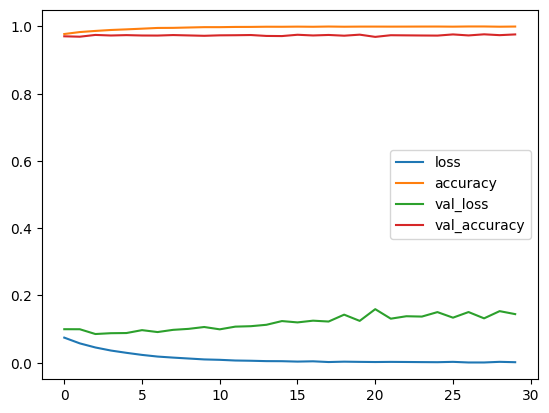

In [30]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [31]:
loss, accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1446 - accuracy: 0.9762


In [32]:
print(loss)

0.14460738003253937


In [33]:
print(accuracy)

0.9761999845504761


1/1 [==============================] - 0s 25ms/step
This digit is probably a 2


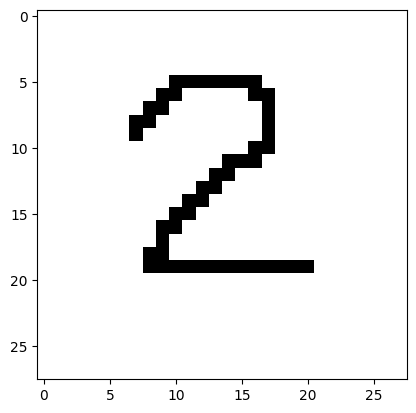

1/1 [==============================] - 0s 22ms/step
This digit is probably a 3


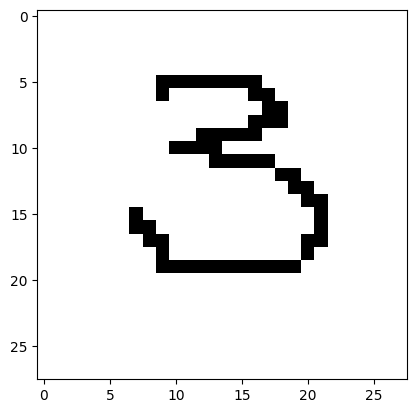

1/1 [==============================] - 0s 20ms/step
This digit is probably a 2


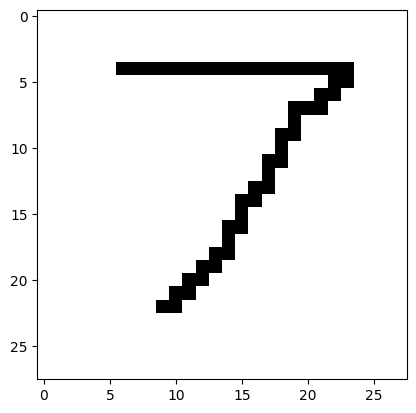

1/1 [==============================] - 0s 20ms/step
This digit is probably a 8


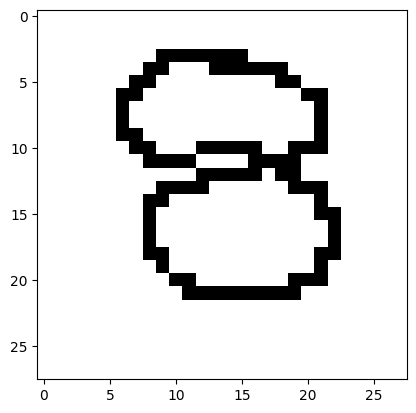

1/1 [==============================] - 0s 20ms/step
This digit is probably a 1


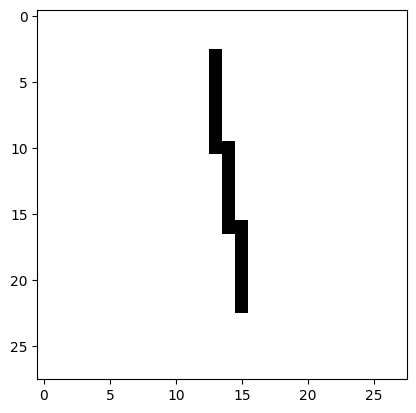

1/1 [==============================] - 0s 19ms/step
This digit is probably a 2


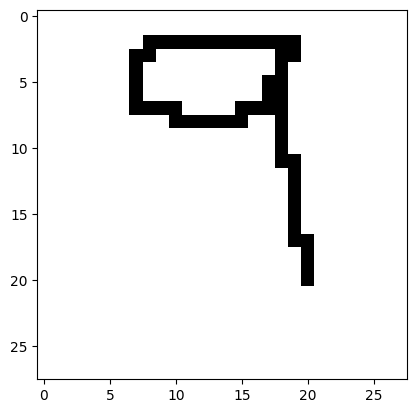

1/1 [==============================] - 0s 31ms/step
This digit is probably a 5


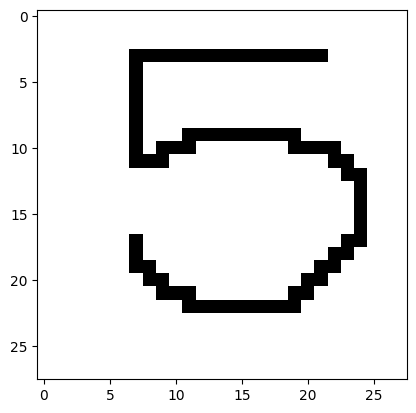

In [36]:
image_number = 1

while os.path.isfile(f'/content/drive/MyDrive/Colab Notebooks/ML-FILES/D{image_number}.png'):
  try:
    img = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/ML-FILES/D{image_number}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'This digit is probably a {np.argmax(prediction)}')
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()
  except:
    print('Error')
  finally:
    image_number += 1
